# Prediction of the superconductor critical temperature based on its physical and chemical properties

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm

In [2]:
#input data
train = pd.read_csv('train.csv')
unique_m = pd.read_csv('unique_m.csv')

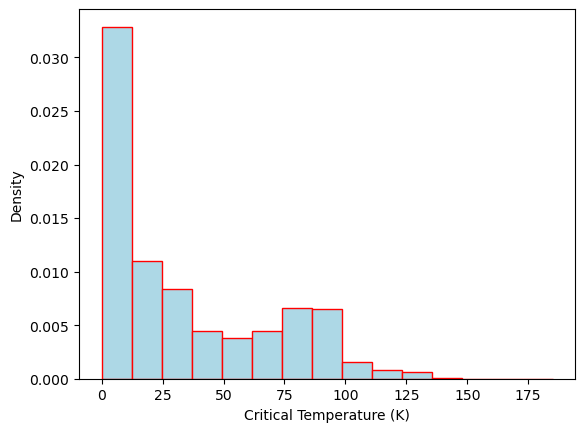

In [3]:
#Create histogram of semiconductor critical temperature
plt.hist(unique_m.critical_temp,bins = 15, density = True, color = "lightblue", ec="red", lw=1);
plt.xlabel('Critical Temperature (K)');
plt.ylabel('Density');
plt.savefig('Density vs Critical Temperature.png', dpi = 300)

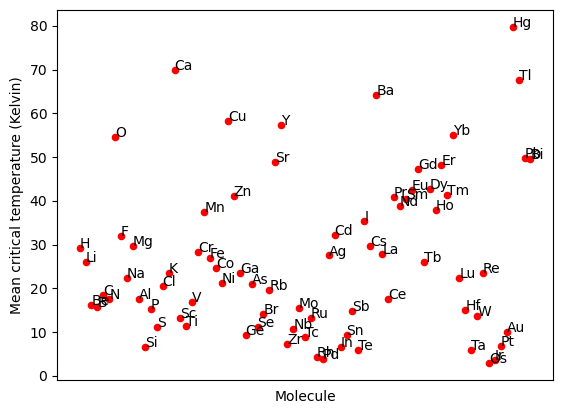

In [4]:
#Drawing average critical temperature for different molecules
binary = unique_m.iloc[: , :-2]
binary[binary != 0] = 1
df_mean = binary.mean(axis=0)
# Average Critical Temperature for Molecules
full_data = binary.join(unique_m['critical_temp'])
dict_t = {}
for (colName, colData) in full_data.iteritems():
    result = full_data[(full_data[colName] == 1)]    
    if not result.empty and colName != 'critical_temp':
        dict_t[colName] = result["critical_temp"].mean()
series = pd.Series(dict_t)
data = pd.DataFrame({'Molecule':series.index, 'Tc_Mean':series.values},index=series.index.tolist())
fig, ax = plt.subplots()
data.plot('Molecule', 'Tc_Mean', kind='scatter', ax=ax, c='red')
for a, b in data.iterrows():
       ax.annotate(a, b)
plt.ylabel('Mean critical temperature (Kelvin)')
ax.axes.get_xaxis().set_ticks([])
plt.xlabel('Molecule')
plt.savefig('Mean Critical Temp per molecule.png', dpi = 300)

In [5]:
#### linear model to predict critical temperature from chemical formula
x = unique_m.iloc[: , :-2]
y = unique_m['critical_temp']

training_accuracy = []
test_accuracy = []

for i in range(6600, 6630):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=i)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    #Check Accuracy
    print("i =",i,'R2 =',
          round(r2_score(y_test,y_pred),3),
          'MSE=',round(mean_squared_error(y_test,y_pred),3),
          'RMSE=',round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print()

# From this we conclude i = 6617 R2 = 0.646 MSE= 411.886 RMSE= 20.295

i = 6600 R2 = 0.617 MSE= 464.302 RMSE= 21.548

i = 6601 R2 = 0.368 MSE= 729.767 RMSE= 27.014

i = 6602 R2 = 0.579 MSE= 491.811 RMSE= 22.177

i = 6603 R2 = 0.628 MSE= 453.902 RMSE= 21.305

i = 6604 R2 = 0.632 MSE= 426.713 RMSE= 20.657

i = 6605 R2 = 0.613 MSE= 445.551 RMSE= 21.108

i = 6606 R2 = 0.611 MSE= 464.646 RMSE= 21.556

i = 6607 R2 = 0.597 MSE= 486.763 RMSE= 22.063

i = 6608 R2 = 0.384 MSE= 734.656 RMSE= 27.105

i = 6609 R2 = 0.589 MSE= 479.883 RMSE= 21.906

i = 6610 R2 = 0.63 MSE= 427.179 RMSE= 20.668

i = 6611 R2 = 0.397 MSE= 700.258 RMSE= 26.462

i = 6612 R2 = 0.574 MSE= 500.789 RMSE= 22.378

i = 6613 R2 = 0.626 MSE= 429.019 RMSE= 20.713

i = 6614 R2 = 0.607 MSE= 470.49 RMSE= 21.691

i = 6615 R2 = 0.388 MSE= 716.075 RMSE= 26.76

i = 6616 R2 = 0.52 MSE= 557.843 RMSE= 23.619

i = 6617 R2 = 0.646 MSE= 411.886 RMSE= 20.295

i = 6618 R2 = 0.359 MSE= 743.805 RMSE= 27.273

i = 6619 R2 = 0.597 MSE= 469.476 RMSE= 21.667

i = 6620 R2 = 0.519 MSE= 574.063 RMSE= 23.96

i = 6621 R2 = 0.58

In [6]:
#### linear model to predict critical temperature from chemical formula
x = unique_m.iloc[: , :-2]
y = unique_m['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=6617)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
#Check Accuracy
print('R2= ',r2_score(y_test,y_pred))
print('MSE=',mean_squared_error(y_test,y_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred)))

R2=  0.6459816685472296
MSE= 411.8856775004354
RMSE= 20.294966802151595


In [7]:
#Run RF from Physical Properties Data
y = np.array(train.critical_temp)
#Drop unnecessary variables
train.drop(['critical_temp'],1,inplace=True)
#Define input variable
X=train.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6617)

C:\Users\User\AppData\Local\Temp\ipykernel_9360\1958885634.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop(['critical_temp'],1,inplace=True)


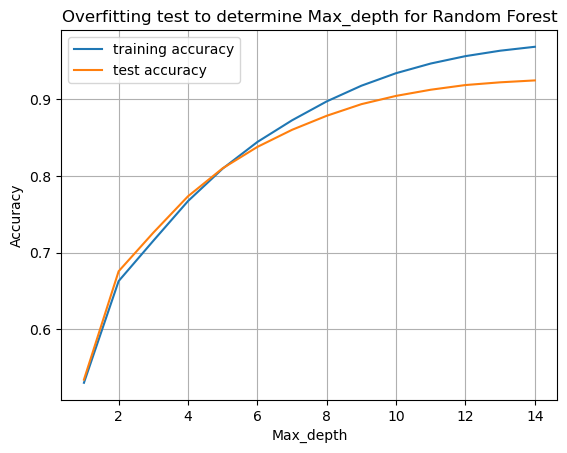

In [8]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 15
depth_settings = range(1, 15)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6617)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depth");
plt.legend();
plt.grid();
plt.title("Overfitting test to determine Max_depth for Random Forest");
plt.savefig('RF_Overfitting vs Max_depth.png',dpi = 300)

# We see that max_depth=8 is reasonable

In [9]:
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.897
Accuracy on test set: 0.878


In [10]:
#Check feature importance for top 15 features
a = np.array(train.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_15 = result.tail(15)

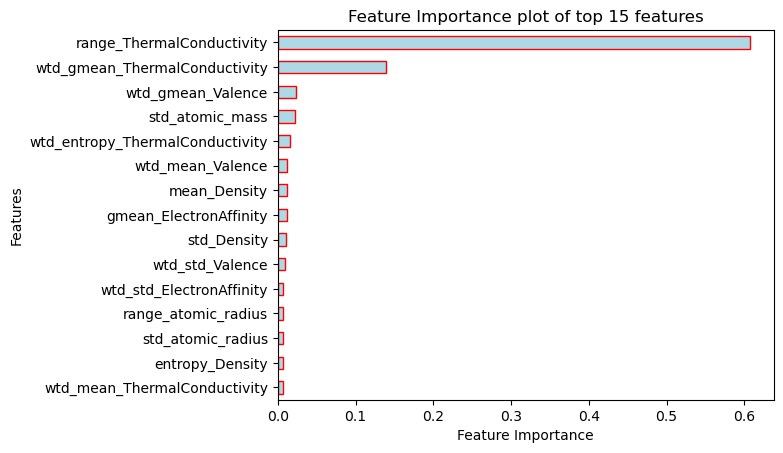

In [11]:
#Draw feature importance plot
result_15.plot.barh(x='Features', y='Importance',legend=False,color = "lightblue", ec="red", lw=1);
plt.xlabel('Feature Importance');
plt.title("Feature Importance plot of top 15 features");
plt.savefig('RF_Feature_Importance.png',dpi = 300)

In [12]:
result2 = result.sort_values(by = 'Importance', ascending = False, ignore_index=True)
result2['rank'] = result2.index +1
result2

,Features,Importance,rank
0,range_ThermalConductivity,0.607484,1
1,wtd_gmean_ThermalConductivity,0.138794,2
2,wtd_gmean_Valence,0.023306,3
3,std_atomic_mass,0.022242,4
4,wtd_entropy_ThermalConductivity,0.015970,5
...,...,...,...
76,range_Density,0.000350,77
77,range_FusionHeat,0.000157,78
78,mean_Valence,0.000104,79
79,range_Valence,0.000058,80


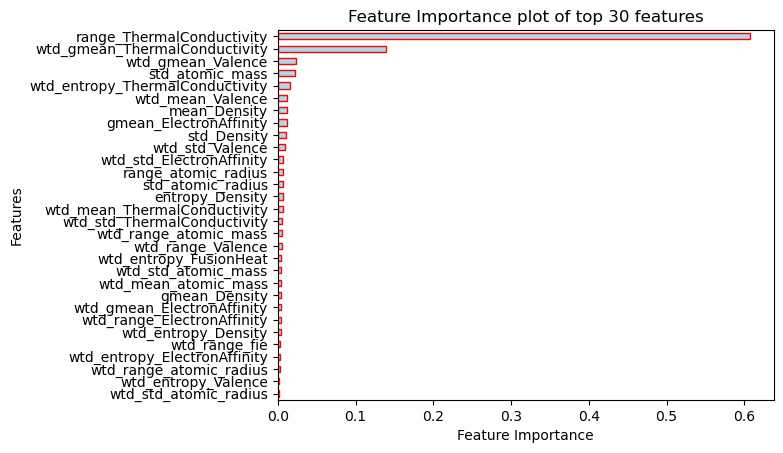

In [13]:
#Draw feature importance plot
result.tail(30).plot.barh(x='Features', y='Importance',legend=False,color = "lightblue", ec="red", lw=1);
plt.xlabel('Feature Importance');
plt.title("Feature Importance plot of top 30 features");
#plt.savefig('RF_Feature_Importance.png',dpi = 300)

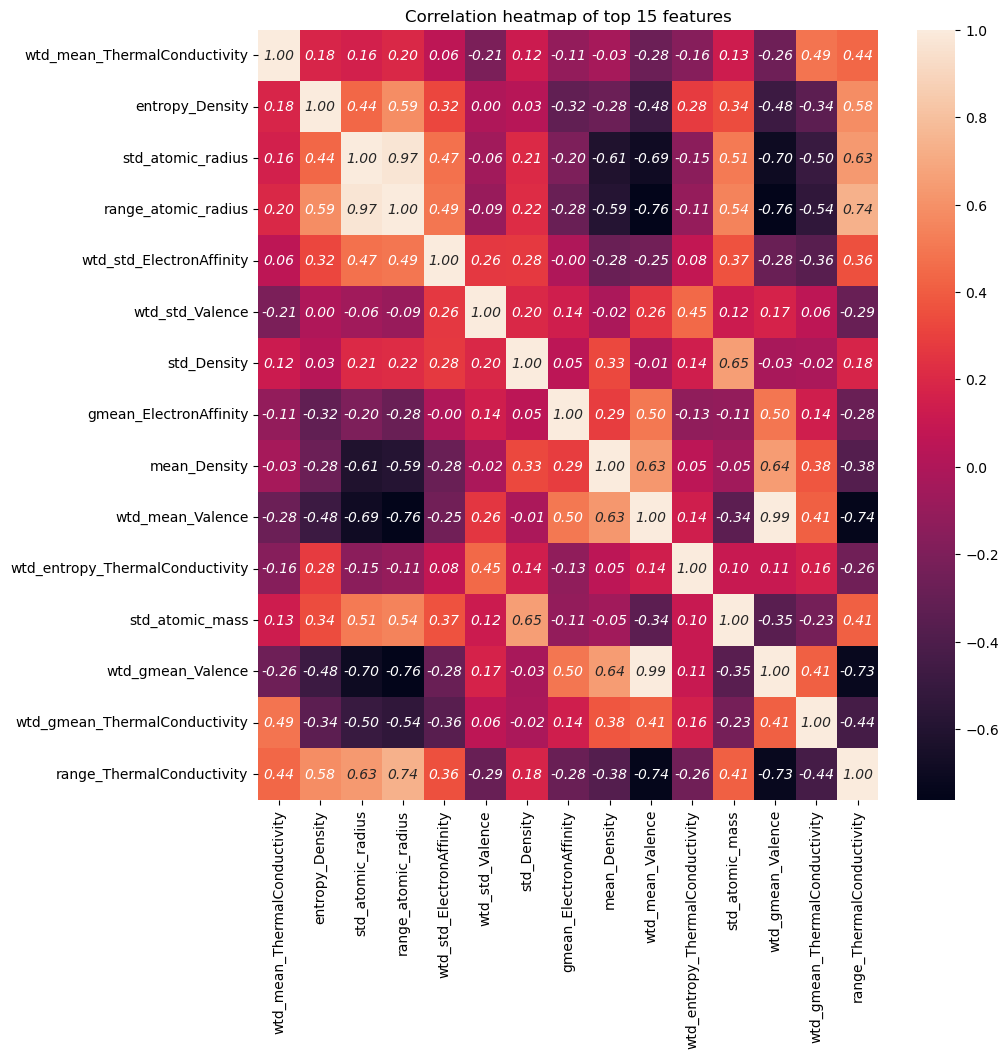

In [14]:
#Prepare data for different number of feature importance to create correlation plots
result_15 = result.tail(15)
result_5 = result.tail(5)
result_10 = result.tail(10)
result_20 = result.tail(20)
result_25 = result.tail(25)
result_30 = result.tail(30)
result_35 = result.tail(35)
train_5 = train[result_5.Features]
train_10 = train[result_10.Features]
train_15 = train[result_15.Features]
train_20 = train[result_20.Features]
train_25 = train[result_25.Features]
train_30 = train[result_30.Features]
train_35 = train[result_35.Features]
X_5=train_5.values
X_10 = train_10.values
X_15 = train_15.values
X_20 = train_20.values
X_25 = train_25.values
X_30 = train_30.values
X_35 = train_35.values
corrM = train_15.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(10,10))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)
plt.title("Correlation heatmap of top 15 features");
plt.savefig('correlation matrix.png',dpi = 300,bbox_inches = 'tight')

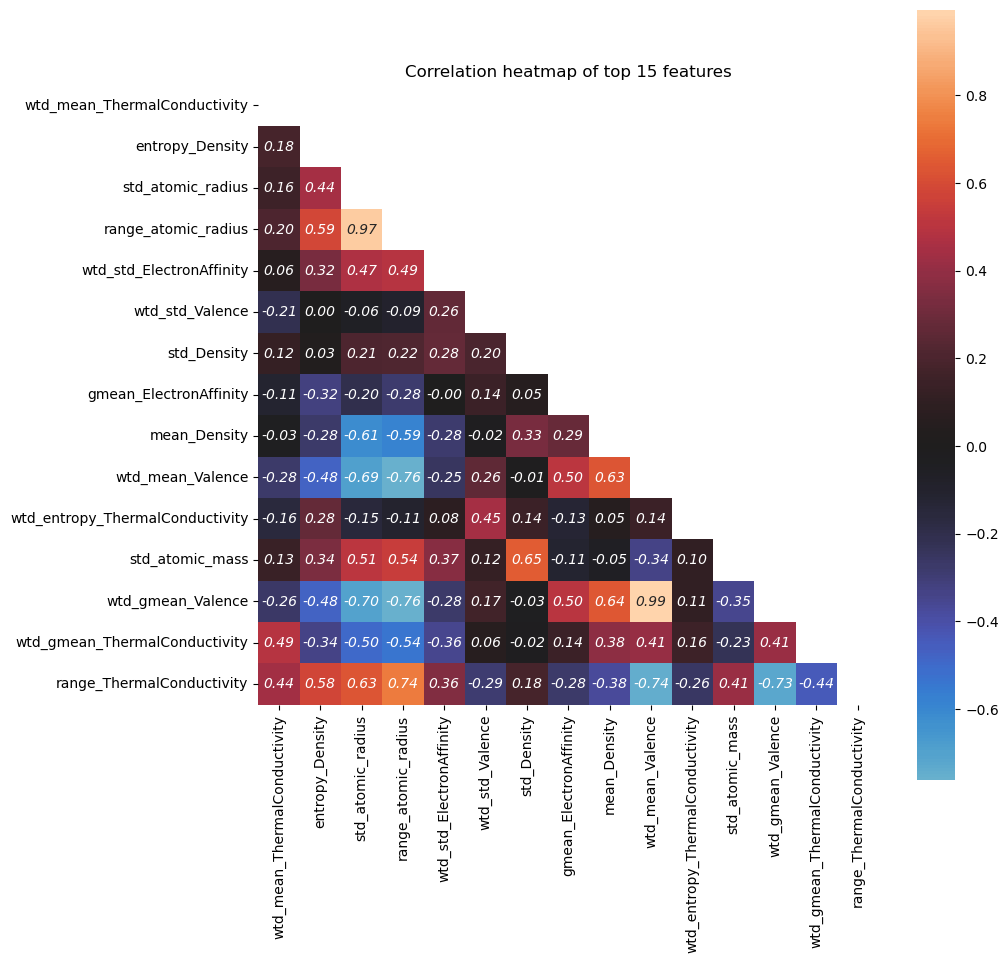

In [15]:
#Prepare data for different number of feature importance to create correlation plots
result_15 = result.tail(15)
result_5 = result.tail(5)
result_10 = result.tail(10)
result_20 = result.tail(20)
result_25 = result.tail(25)
result_30 = result.tail(30)
result_35 = result.tail(35)
train_5 = train[result_5.Features]
train_10 = train[result_10.Features]
train_15 = train[result_15.Features]
train_20 = train[result_20.Features]
train_25 = train[result_25.Features]
train_30 = train[result_30.Features]
train_35 = train[result_35.Features]
X_5=train_5.values
X_10 = train_10.values
X_15 = train_15.values
X_20 = train_20.values
X_25 = train_25.values
X_30 = train_30.values
X_35 = train_35.values
corrM = train_15.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True)
plt.title("Correlation heatmap of top 15 features");
plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.766e+05, tolerance: 1.864e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.058e+06, tolerance: 1.864e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\envs\myenv2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

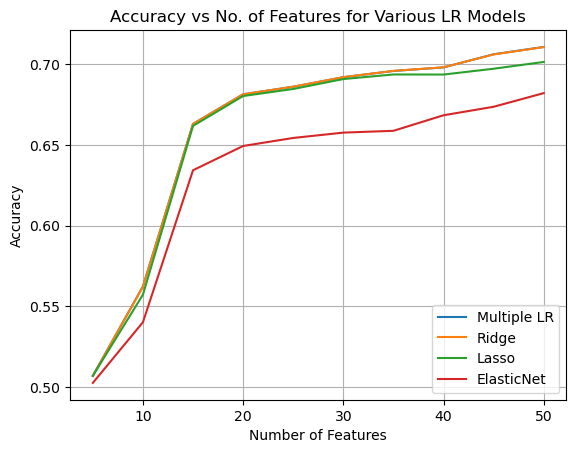

In [16]:
#Accuracy check for different regression models
accuracy = []
accuracy_ridge = []
accuracy_lasso = []
accuracy_elastic = []
# try features from 5 to 50
n_features = [5,10,15,20,25,30,35,40,45,50]
for features in n_features:
    X_n_features = result.tail(features)
    train_n_features = train[X_n_features.Features]
    X_features = train_n_features.values
    X_train, X_test, y_train, y_test = train_test_split(X_features,y, random_state=80)
    reg = LinearRegression().fit(X_train, y_train)
    accuracy.append(reg.score(X_test, y_test)) 
    clf = Ridge(alpha=1.0)
    clf.fit(X_train, y_train)
    accuracy_ridge.append(clf.score(X_test, y_test))
    cld = linear_model.Lasso(alpha=0.1)
    cld.fit(X_train, y_train)
    accuracy_lasso.append(cld.score(X_test,y_test))
    regr = ElasticNet(random_state=0)
    regr.fit(X_train, y_train)
    accuracy_elastic.append(regr.score(X_test, y_test))
plt.plot(n_features, accuracy,label="Multiple LR");
plt.plot(n_features,accuracy_ridge,label="Ridge");
plt.plot(n_features,accuracy_lasso,label="Lasso");
plt.plot(n_features,accuracy_elastic,label="ElasticNet") 
plt.ylabel("Accuracy");
plt.xlabel("Number of Features");
plt.legend();
plt.grid();
plt.title("Accuracy vs No. of Features for Various LR Models");
plt.savefig('Comparison of Linear Regression models.png',dpi = 300,bbox_inches = 'tight')

# We see that the accuracy does not increase much after the top 20 features. SO, we go with top 20 features.

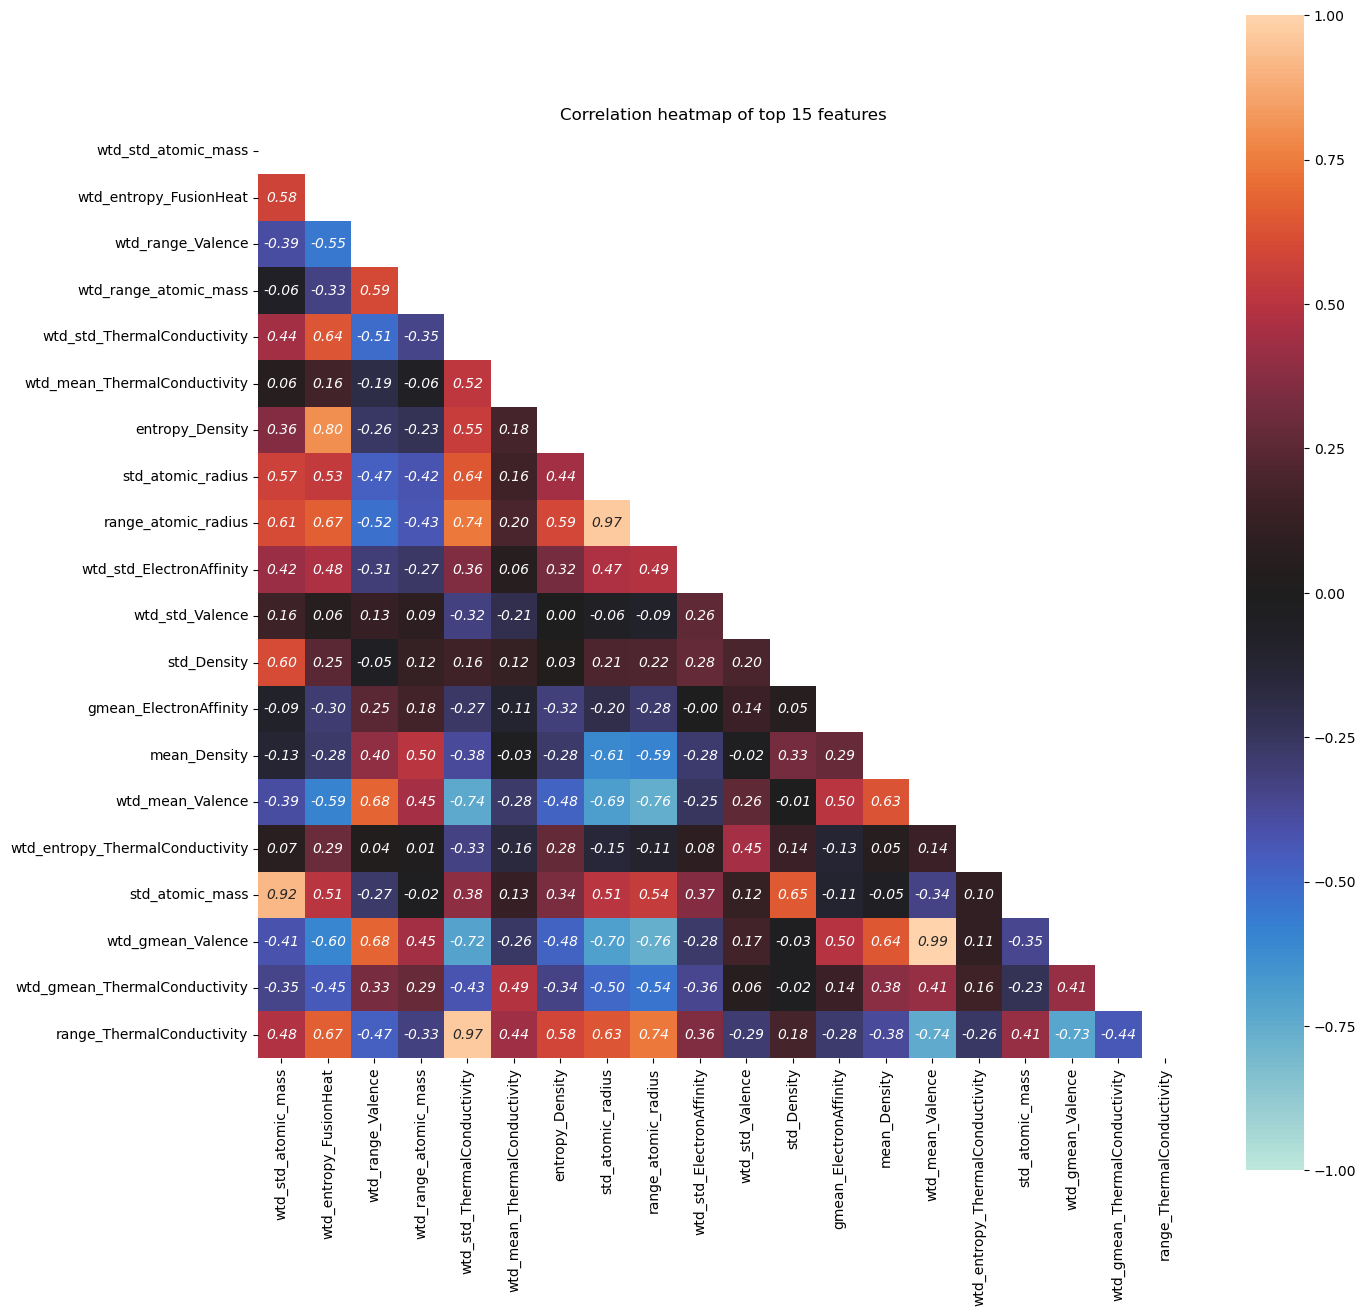

In [17]:
# Round 1
#Correlation plot for top 20 features
result_20 = result.tail(20)
train_20 = train[result_20.Features]
#train_20
corrM = train_20.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True,vmax=1, vmin=-1)
plt.title("Correlation heatmap of top 15 features");
#plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

In [18]:
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat)
sorted_mat.tail(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9360\2911408496.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrM.shape), k=1).astype(np.bool))


range_ThermalConductivity  wtd_entropy_FusionHeat         0.667712
wtd_gmean_Valence          wtd_range_Valence              0.681415
wtd_mean_Valence           wtd_range_Valence              0.683700
range_ThermalConductivity  range_atomic_radius            0.736137
range_atomic_radius        wtd_std_ThermalConductivity    0.736142
entropy_Density            wtd_entropy_FusionHeat         0.802633
std_atomic_mass            wtd_std_atomic_mass            0.919788
range_ThermalConductivity  wtd_std_ThermalConductivity    0.965449
range_atomic_radius        std_atomic_radius              0.967428
wtd_gmean_Valence          wtd_mean_Valence               0.994939
dtype: float64

In [19]:
result2.columns

Index(['Features', 'Importance', 'rank'], dtype='object')

In [20]:
result2[result2['Features'].isin(['std_atomic_mass','wtd_std_atomic_mass',
                                 'range_ThermalConductivity','wtd_std_ThermalConductivity',
                                 'range_atomic_radius','std_atomic_radius',
                                 'wtd_gmean_Valence','wtd_mean_Valence'])]
# The lower ranked feature in each pair will be dropped
# So we drop: 'wtd_std_atomic_mass', 'wtd_std_ThermalConductivity','std_atomic_radius','wtd_mean_Valence'

,Features,Importance,rank
0,range_ThermalConductivity,0.607484,1
2,wtd_gmean_Valence,0.023306,3
3,std_atomic_mass,0.022242,4
5,wtd_mean_Valence,0.011589,6
11,range_atomic_radius,0.006764,12
12,std_atomic_radius,0.006604,13
15,wtd_std_ThermalConductivity,0.005756,16
19,wtd_std_atomic_mass,0.004460,20


In [21]:
#Delete high collinear variables (Pearson coefficient > 0.80)
correlation_1 = train.drop(['wtd_std_atomic_mass', 'wtd_std_ThermalConductivity','std_atomic_radius','wtd_mean_Valence' ], axis=1)

In [22]:
#Run random forest again to get revised correlation
X=correlation_1.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6617)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.895
Accuracy on test set: 0.877


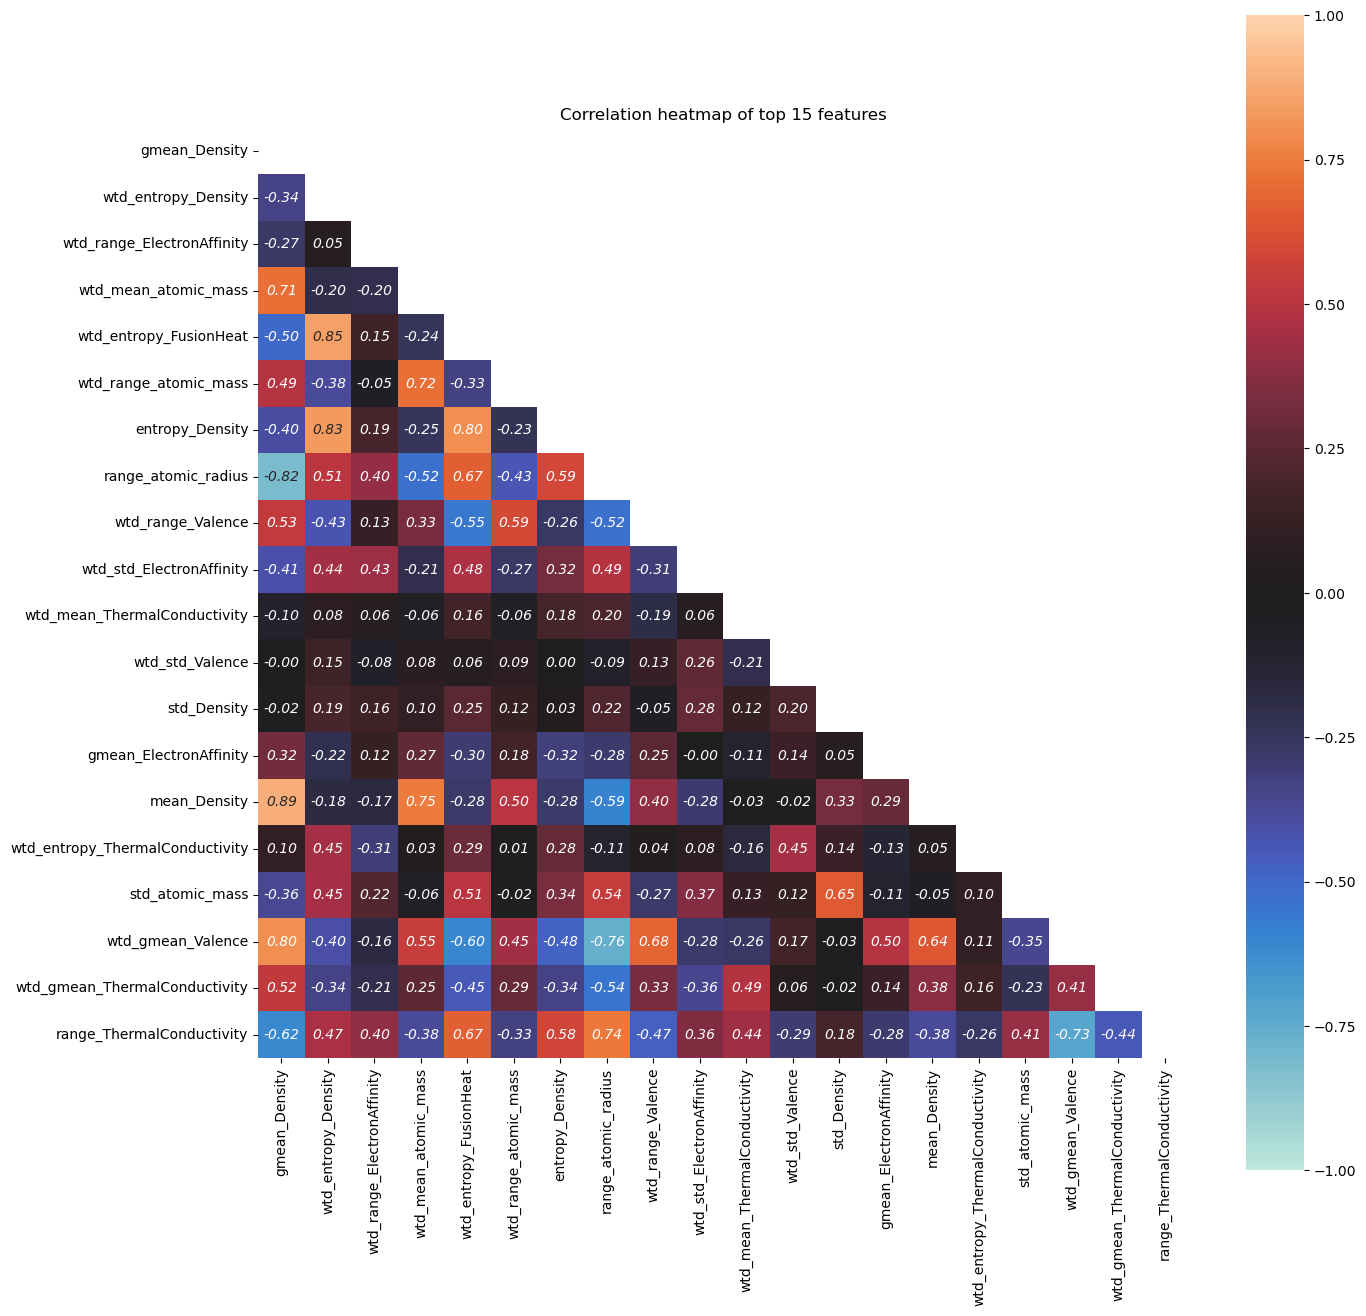

In [23]:
# Round 2
#Correlation plot for revised features
a = np.array(correlation_1.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_20 = result.tail(20)
train_20 = train[result_20.Features]
train_20
corrM = train_20.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True,vmax=1, vmin=-1)
plt.title("Correlation heatmap of top 15 features");
#plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

In [24]:
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat)
sorted_mat.tail(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9360\2911408496.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrM.shape), k=1).astype(np.bool))


wtd_gmean_Valence          wtd_range_Valence         0.681415
wtd_mean_atomic_mass       gmean_Density             0.712815
wtd_range_atomic_mass      wtd_mean_atomic_mass      0.716623
range_ThermalConductivity  range_atomic_radius       0.736137
mean_Density               wtd_mean_atomic_mass      0.749261
wtd_gmean_Valence          gmean_Density             0.798386
entropy_Density            wtd_entropy_FusionHeat    0.802633
                           wtd_entropy_Density       0.833868
wtd_entropy_FusionHeat     wtd_entropy_Density       0.846299
mean_Density               gmean_Density             0.889264
dtype: float64

In [25]:
result2[result2['Features'].isin(['entropy_Density','wtd_entropy_FusionHeat',
                                 'wtd_entropy_Density',
                                 'wtd_entropy_FusionHeat','wtd_entropy_Density',
                                 'mean_Density','gmean_Density'])]
# The lower ranked feature in each pair will be dropped
# So we drop: 'wtd_entropy_FusionHeat', 'wtd_entropy_Density','gmean_Density'

,Features,Importance,rank
6,mean_Density,0.011365,7
13,entropy_Density,0.006180,14
18,wtd_entropy_FusionHeat,0.004630,19
21,gmean_Density,0.003805,22
24,wtd_entropy_Density,0.003517,25


In [26]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_2 = correlation_1.drop(['wtd_entropy_FusionHeat', 'wtd_entropy_Density','gmean_Density'], axis=1)

In [27]:
#Run random forest again to get revised correlation
X=correlation_2.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6617)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_2.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_20 = result.tail(20)

Accuracy on training set: 0.894
Accuracy on test set: 0.876


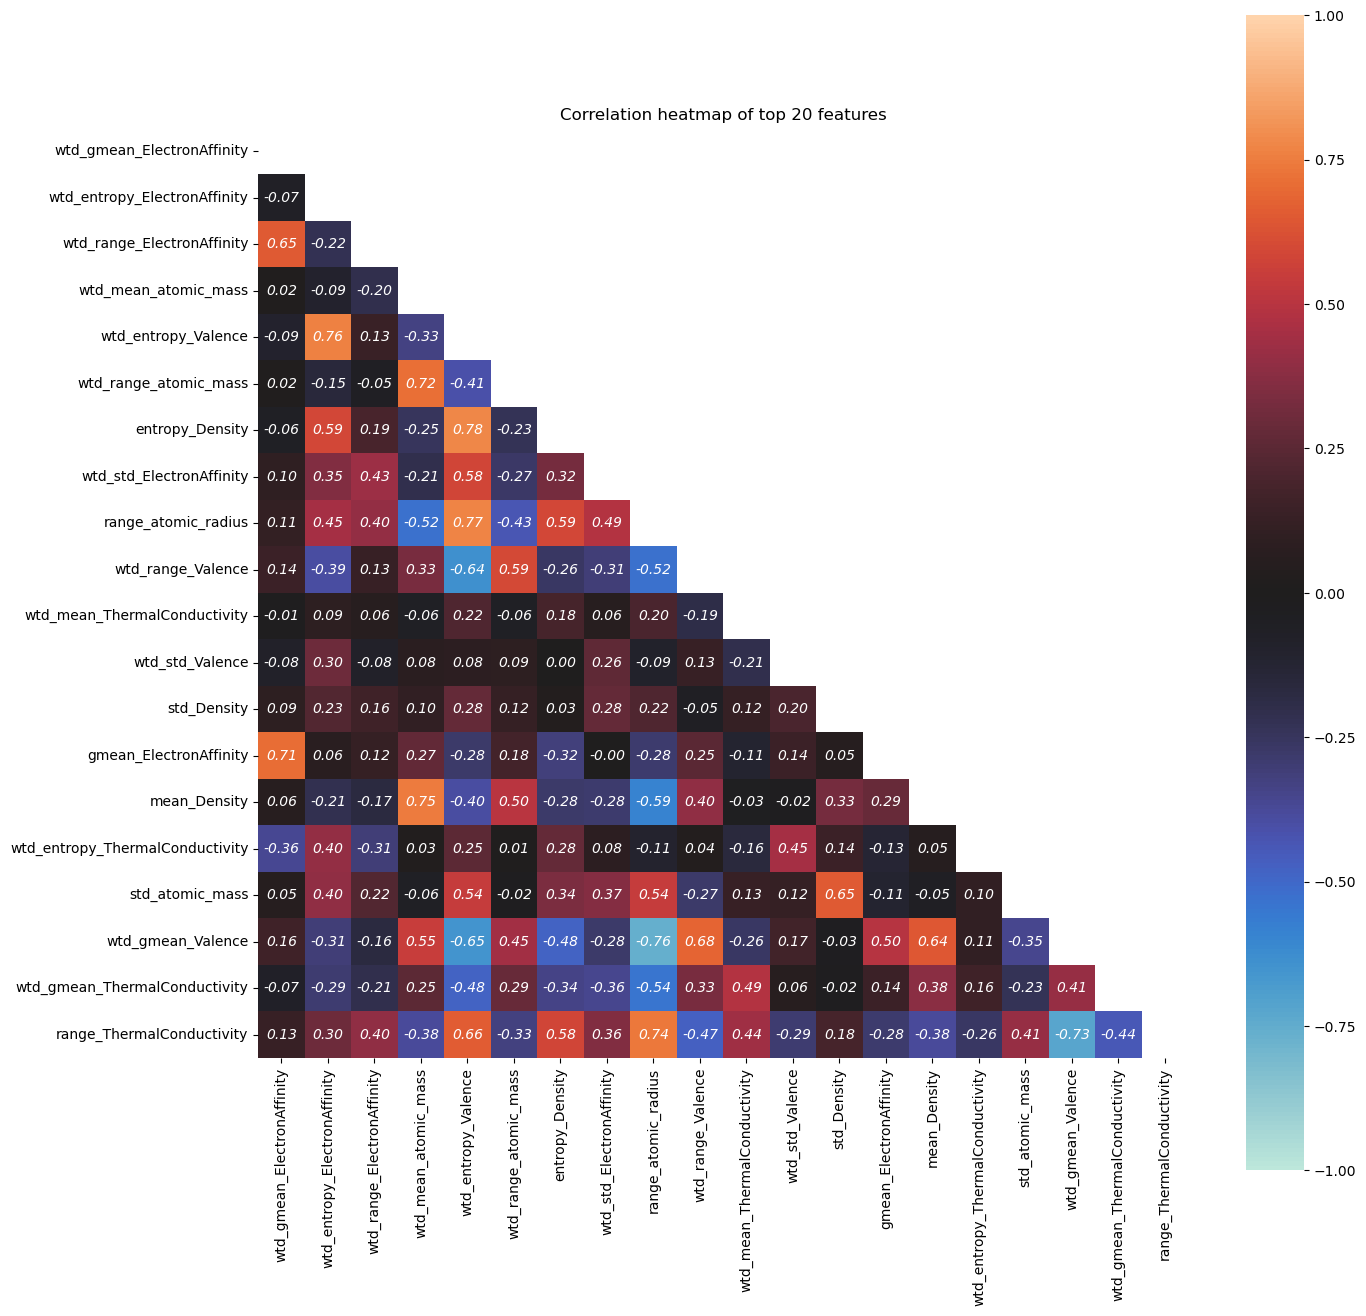

In [28]:
# Round 3
#Correlation plot for revised features
train_20 = train[result_20.Features]
corrM = train_20.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True,vmax=1, vmin=-1)
plt.title("Correlation heatmap of top 20 features");
#plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

In [29]:
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat)
sorted_mat.tail(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9360\2911408496.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrM.shape), k=1).astype(np.bool))


std_atomic_mass            std_Density                     0.654985
range_ThermalConductivity  wtd_entropy_Valence             0.658391
wtd_gmean_Valence          wtd_range_Valence               0.681415
gmean_ElectronAffinity     wtd_gmean_ElectronAffinity      0.708419
wtd_range_atomic_mass      wtd_mean_atomic_mass            0.716623
range_ThermalConductivity  range_atomic_radius             0.736137
mean_Density               wtd_mean_atomic_mass            0.749261
wtd_entropy_Valence        wtd_entropy_ElectronAffinity    0.759590
range_atomic_radius        wtd_entropy_Valence             0.768452
entropy_Density            wtd_entropy_Valence             0.779776
dtype: float64

In [30]:
result2 = result.sort_values(by = 'Importance', ascending = False, ignore_index=True)
result2['rank'] = result2.index +1
result2

,Features,Importance,rank
0,range_ThermalConductivity,0.608955,1
1,wtd_gmean_ThermalConductivity,0.139580,2
2,wtd_gmean_Valence,0.032088,3
3,std_atomic_mass,0.024614,4
4,wtd_entropy_ThermalConductivity,0.016521,5
...,...,...,...
69,range_Density,0.000222,70
70,range_FusionHeat,0.000208,71
71,mean_Valence,0.000163,72
72,range_Valence,0.000085,73


In [31]:
result2[result2['Features'].isin(['range_atomic_radius','wtd_std_atomic_radius'])]
# The lower ranked feature in each pair will be dropped
# So we drop: 'wtd_std_atomic_radius'

,Features,Importance,rank
11,range_atomic_radius,0.007728,12
24,wtd_std_atomic_radius,0.002570,25


In [32]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_3 = correlation_2.drop(['wtd_std_atomic_radius'], axis=1)

In [33]:
#Run random forest again to get revised correlation
X=correlation_3.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6617)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_3.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_20 = result.tail(20)
result_20

Accuracy on training set: 0.894
Accuracy on test set: 0.877


,Features,Importance
39,wtd_gmean_ElectronAffinity,0.003332
41,wtd_entropy_ElectronAffinity,0.003677
43,wtd_range_ElectronAffinity,0.004585
2,wtd_mean_atomic_mass,0.004685
68,wtd_entropy_Valence,0.004695
8,wtd_range_atomic_mass,0.006455
31,entropy_Density,0.007120
45,wtd_std_ElectronAffinity,0.007581
70,wtd_range_Valence,0.007872
26,range_atomic_radius,0.007977


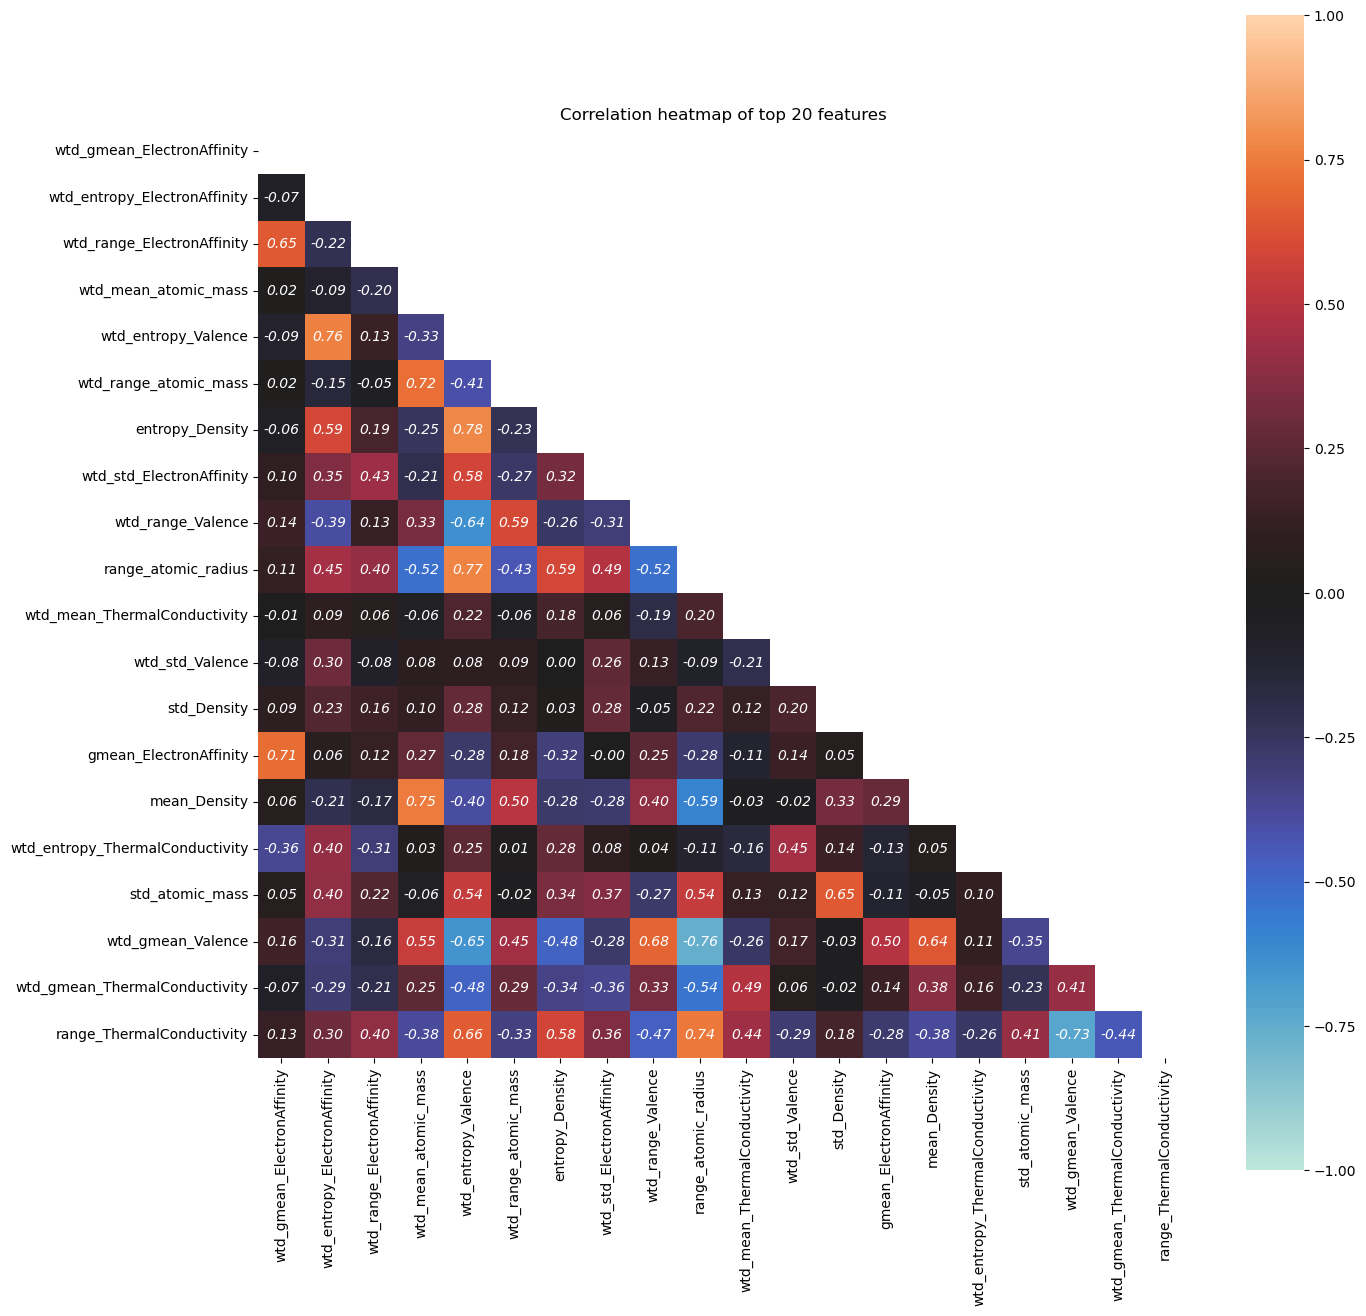

In [34]:
# Round 4
#Correlation plot for revised features
train_20 = train[result_20.Features]
corrM = train_20.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
mask = np.triu(np.ones_like(corrM, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws, mask = mask,center=0, square = True,vmax=1, vmin=-1)
plt.title("Correlation heatmap of top 20 features");
#plt.savefig('Correlation matrix.png',dpi = 300, bbox_inches = 'tight')

In [35]:
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
#print(sorted_mat)
sorted_mat.tail(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9360\2911408496.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrM.shape), k=1).astype(np.bool))


std_atomic_mass            std_Density                     0.654985
range_ThermalConductivity  wtd_entropy_Valence             0.658391
wtd_gmean_Valence          wtd_range_Valence               0.681415
gmean_ElectronAffinity     wtd_gmean_ElectronAffinity      0.708419
wtd_range_atomic_mass      wtd_mean_atomic_mass            0.716623
range_ThermalConductivity  range_atomic_radius             0.736137
mean_Density               wtd_mean_atomic_mass            0.749261
wtd_entropy_Valence        wtd_entropy_ElectronAffinity    0.759590
range_atomic_radius        wtd_entropy_Valence             0.768452
entropy_Density            wtd_entropy_Valence             0.779776
dtype: float64

In [36]:
result2 = result.sort_values(by = 'Importance', ascending = False, ignore_index=True)
result2['rank'] = result2.index +1
result2
#result2[result2['Features'].isin(['range_atomic_radius','wtd_std_atomic_radius'])]
# The lower ranked feature in each pair will be dropped
# So we drop: 'wtd_std_atomic_radius'

,Features,Importance,rank
0,range_ThermalConductivity,0.609000,1
1,wtd_gmean_ThermalConductivity,0.139553,2
2,wtd_gmean_Valence,0.032228,3
3,std_atomic_mass,0.024713,4
4,wtd_entropy_ThermalConductivity,0.016498,5
...,...,...,...
68,range_FusionHeat,0.000249,69
69,range_Density,0.000213,70
70,mean_Valence,0.000130,71
71,range_Valence,0.000100,72


In [37]:
#Run Linear regression model with top 20 features
results_list = result_20['Features']
train = pd.read_csv('train.csv')
X=train[train.columns.intersection(results_list)]
y = train['critical_temp']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=80)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critical_temp   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1616.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:18:19   Log-Likelihood:                -70113.
No. Observations:               15947   AIC:                         1.403e+05
Df Residuals:                   15926   BIC:                         1.404e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               5.1821      1.369      3.786      0.000       2.499       7.865
wtd_mean_atomic_mass                0.1324      0.011     11.766      0.000       0.110       0.154
wtd_range_atomic_mass              -0.1562      0.012    -13.213      0.000      -0.179      -0.133
std_atomic_mass                     0.2327      0.013     17.836      0.000       0.207       0.258
range_atomic_radius                 0.1167      0.006     19.220      0.000       0.105       0.129
mean_Density                       -0.0004      0.000     -2.798      0.005      -0.001      -0.000
entropy_Density                    -9.2943      1.145     -8.117      0.000     -11.539      -7.050
std_Density                        -0.0014      0.000     -7.542      0.000      -0.002      -0.001
gmean_ElectronAffinity              0.0153      0.013      1.152      0.249      -0.011       0.041
wtd_gmean_ElectronAffinity         -0.0329      0.016     -2.008      0.045      -0.065      -0.001
wtd_entropy_ElectronAffinity      -39.2879      1.606    -24.470      0.000     -42.435     -36.141
wtd_range_ElectronAffinity         -0.1987      0.018    -11.005      0.000      -0.234      -0.163
wtd_std_ElectronAffinity            0.0532      0.014      3.802      0.000       0.026       0.081
wtd_mean_ThermalConductivity        0.3907      0.010     40.559      0.000       0.372       0.410
wtd_gmean_ThermalConductivity      -0.4040      0.012    -33.780      0.000      -0.427      -0.381
wtd_entropy_ThermalConductivity    17.2568      0.863     19.992      0.000      15.565      18.949
range_ThermalConductivity           0.0087      0.003      3.253      0.001       0.003       0.014
wtd_gmean_Valence                  -3.4958      0.355     -9.841      0.000      -4.192      -2.799
wtd_entropy_Valence                30.1394      2.095     14.388      0.000      26.033      34.245
wtd_range_Valence                   7.7266      0.448     17.266      0.000       6.849       8.604
wtd_std_Valence                   -12.6297      0.470    -26.885      0.000     -13.550     -11.709
==============================================================================
Omnibus:                      147.483   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.510
Skew:                          -0.135   Prob(JB):                     1.29e-43
Kurtosis:                       3.474   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or o

In [38]:
#RMSE check for different models
y = np.array(train.critical_temp)
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=80)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE_LR= 19.73225553789058
RMSE_Ridge= 19.731752287657727
RMSE_Lasso= 19.86026252080765
RMSE_Elastic= 20.791421958987247
RMSE_Forest= 12.538701452305792


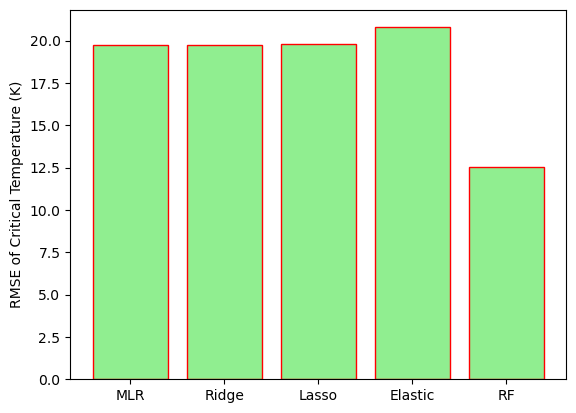

In [39]:
Model = ['MLR','Ridge','Lasso','Elastic','RF']
RMSE = [19.760,19.759,19.778,20.783,12.539]
plt.bar(Model,RMSE, color = "lightgreen", ec="red", lw=1)
plt.ylabel("RMSE of Critical Temperature (K)");
plt.savefig('barplot.png', dpi = 300)

RMSE_Forest= 12.538701452305792
Accuracy on test set: 0.868


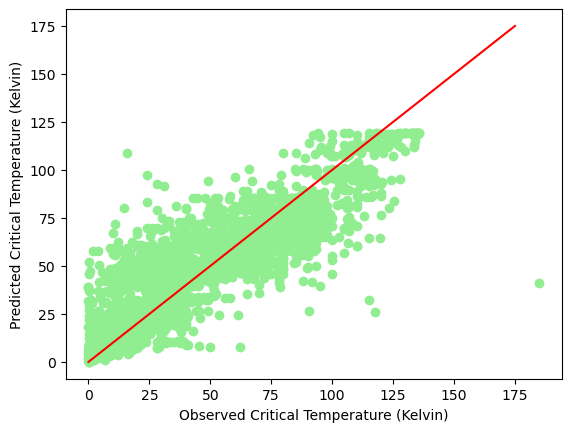

In [47]:
#Draw scatter plot for Random Forest Model
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6617)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45_line = [0,175]
y_45_line = [0,175]
plt.scatter(y_test,y_pred,color = 'lightgreen')
plt.plot(x_45_line,y_45_line,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('RF_Scatter.png', dpi = 300)
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on test set: 0.868


RMSE_LR= 19.73225553789058
Accuracy on test set: 0.672


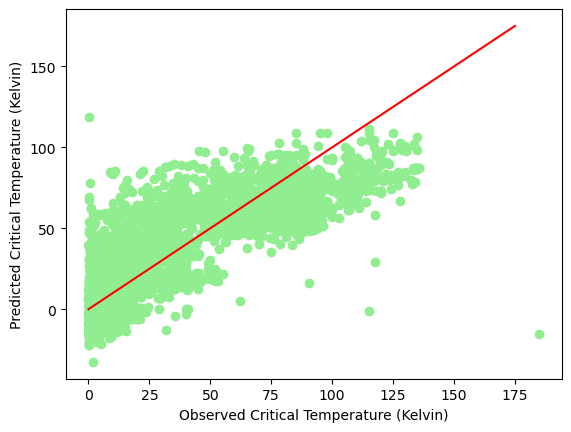

In [48]:
#Draw Scatter plot for linear regression model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45_line = [0,175]
y_45_line = [0,175]
plt.scatter(y_test,y_pred,color = 'lightgreen')
plt.plot(x_45_line,y_45_line,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('LR_Scatter.png', dpi = 300)
print("Accuracy on test set: {:.3f}".format(reg.score(X_test, y_test)))

RMSE_LR= 19.731752287657727
Accuracy on test set: 0.672


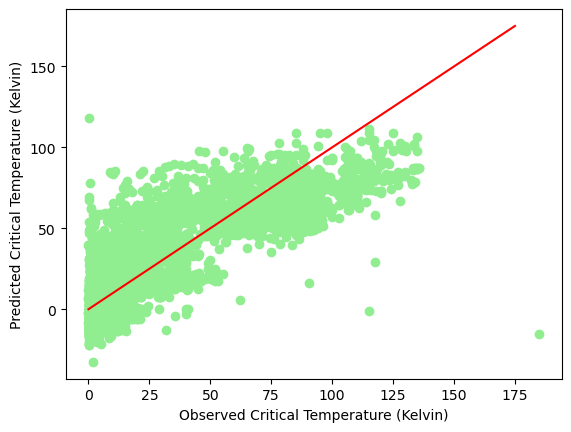

In [49]:
# Draw scatter plot for Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45_line = [0,175]
y_45_line = [0,175]
plt.scatter(y_test,y_pred,color = 'lightgreen')
plt.plot(x_45_line,y_45_line,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('Ridge_Scatter.png', dpi = 300)
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

RMSE_LR= 19.86026252080765
Accuracy on test set: 0.668


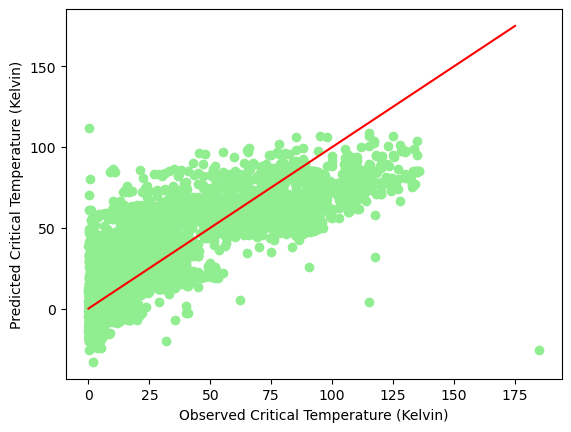

In [50]:
# Draw scatter plot for Lasso
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45_line = [0,175]
y_45_line = [0,175]
plt.scatter(y_test,y_pred,color = 'lightgreen')
plt.plot(x_45_line,y_45_line,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('Lasso_Scatter.png', dpi = 300)
print("Accuracy on test set: {:.3f}".format(cld.score(X_test, y_test)))

RMSE_LR= 20.791421958987247
Accuracy on test set: 0.636


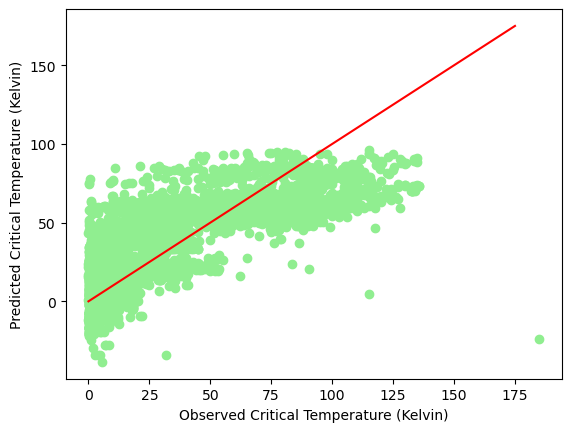

In [51]:
# Draw scatter plot for ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45_line = [0,175]
y_45_line = [0,175]
plt.scatter(y_test,y_pred,color = 'lightgreen')
plt.plot(x_45_line,y_45_line,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('ElasticNet_Scatter.png', dpi = 300)
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))